<p style="text-align: center; font-size: 40px">به نام خدا</p>
<p style="text-align: center; font-size: 30px">فاز دوم تمرین کامپیوتری شماره 5</p>
<p style="text-align: center; font-size: 30px">علی مهرانی - 810198542</p>

In [2]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

# Section 0
Data loading

In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 15s 0us/step


## showing dataset classes image

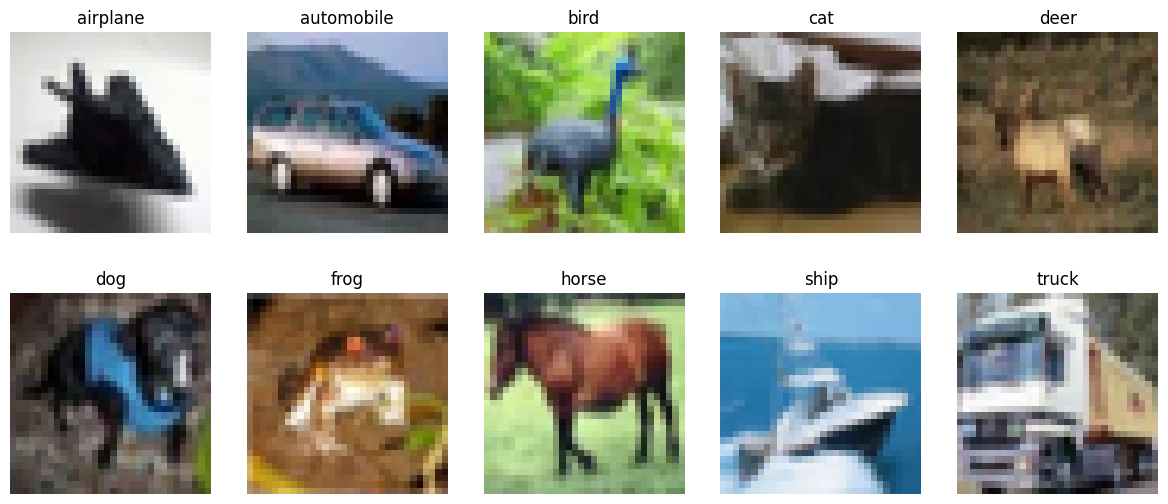

In [4]:
# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot one image from each class
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.subplots_adjust(hspace=0.3, wspace=0.1)

for i, ax in enumerate(axes.flat):
    # Find the first image of the current class in the training set
    index = np.where(y_train == i)[0][0]
    # Display the image
    ax.imshow(x_train[index])
    ax.set_title(class_names[i])
    ax.axis('off')
    
plt.show()

## Showing test/train data distibution

### train

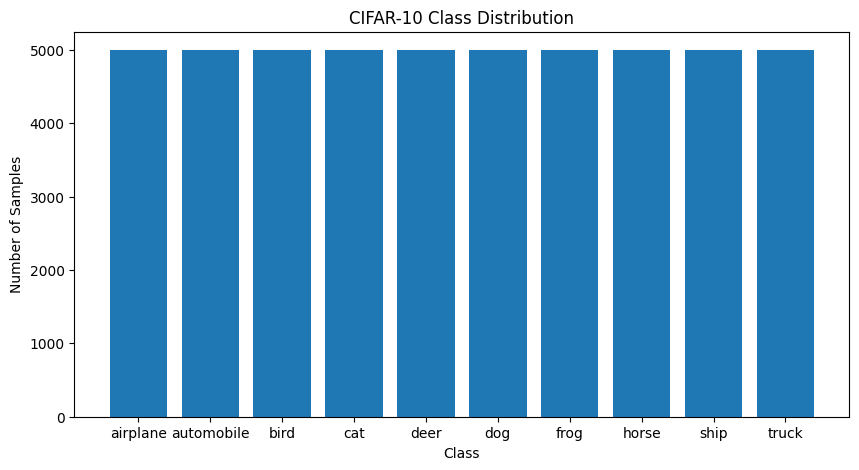

In [5]:
unique_labels, label_counts = np.unique(y_train, return_counts=True)

# Plot the label counts
plt.figure(figsize=(10,5))
plt.bar(unique_labels, label_counts)
plt.xticks(unique_labels, class_names)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('CIFAR-10 Class Distribution')
plt.show()

### test

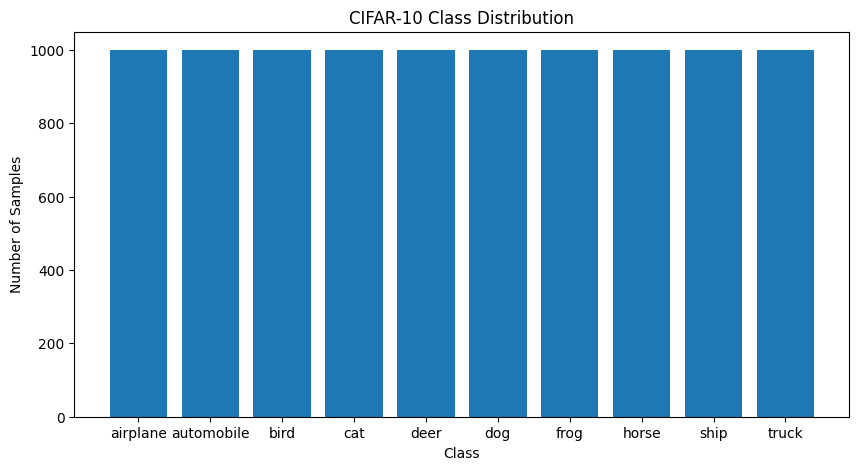

In [6]:
unique_labels, label_counts = np.unique(y_test, return_counts=True)

# Plot the label counts
plt.figure(figsize=(10,5))
plt.bar(unique_labels, label_counts)
plt.xticks(unique_labels, class_names)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('CIFAR-10 Class Distribution')
plt.show()

## Normalization

Since we're giving our images to the CNN, their shape must be matched to what our model expects, so we reshape our iamges to (32 X 32 X 3) RGB images and normalize it's pixel values to be in the range of (0,1). 

In [7]:
x_train=x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

x_train=x_train / 255.0
x_test=x_test / 255.0

## Label Encoding

We use One Hot encoding here to apply label encoding for 'categorial values'.

In [8]:
classes_num = 10
y_train = tf.keras.utils.to_categorical(y_train, classes_num)
y_test  = tf.keras.utils.to_categorical(y_test , classes_num)

Let's test it.

In [9]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

Let's see some images again.

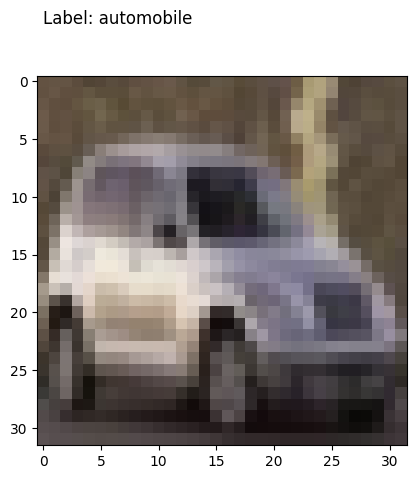

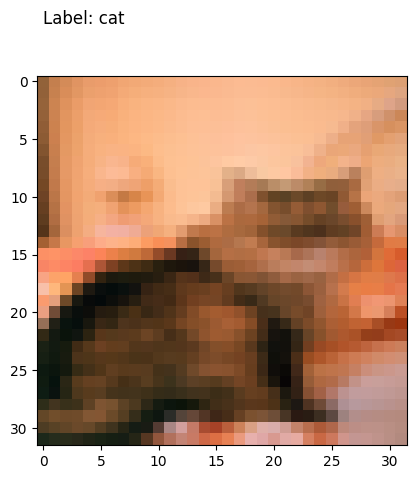

In [10]:
import random
rand_train = random.randint(0, 49999)
rand_test  = random.randint(0, 9999)

plt.imshow(x_train[rand_train])
plt.text(0, -5, f"Label: {class_names[np.argmax(y_train[rand_train])]}", fontsize=12, color="black")
plt.show()

plt.imshow(x_test[rand_test])
plt.text(0, -5, f"Label: {class_names[np.argmax(y_test[rand_test])]}", fontsize=12, color="black")
plt.show()

# Section 1
## Creating CNN

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Activation, Input, Flatten
from tensorflow.keras.optimizers import Adam

In [12]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
cnn.add(Activation('relu'))
cnn.add(Conv2D(32, (3, 3)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(64, (3, 3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(Conv2D(64, (3, 3)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Flatten())
cnn.add(Dense(512))
cnn.add(Activation('relu'))
cnn.add(Dense(10))
cnn.add(Activation('softmax'))

cnn.compile(loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])
log = cnn.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))


Epoch 1/20
1563/1563 [==============================] - 21s 6ms/step - loss: 1.3287 - accuracy: 0.5198 - val_loss: 0.9881 - val_accuracy: 0.6576
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8726 - accuracy: 0.6944 - val_loss: 0.9498 - val_accuracy: 0.6681
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6776 - accuracy: 0.7624 - val_loss: 0.7758 - val_accuracy: 0.7313
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5268 - accuracy: 0.8138 - val_loss: 0.7522 - val_accuracy: 0.7487
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3984 - accuracy: 0.8590 - val_loss: 0.7863 - val_accuracy: 0.7553
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2824 - accuracy: 0.9001 - val_loss: 0.9232 - val_accuracy: 0.7443
Epoch 7/20
1563/1563 [==============================] - 9s 5ms/step - loss: 0.2005 - accuracy: 0.9311 - val_loss: 1.1109 - val_accuracy

## Test data prediction

In [14]:
test_loss, test_accuracy = cnn.evaluate(x_test, y_test) # it's actually done above by setting validation attribute when fitting

313/313 [==============================] - 1s 3ms/step - loss: 2.1233 - accuracy: 0.7372


## Evaluation

Text(0.5, 0, 'Epoch')

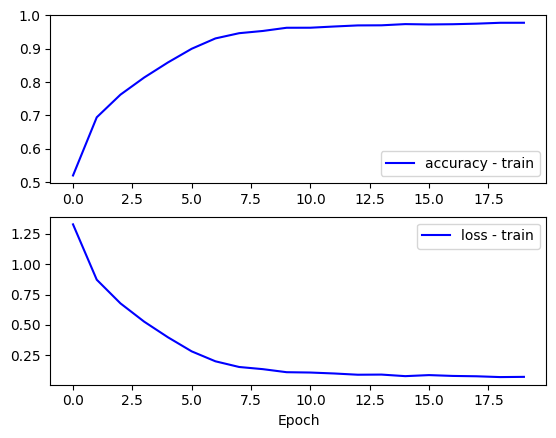

In [28]:
figure, ax = plt.subplots(2,1)

ax[0].plot(log.history['accuracy'], color='b', label="accuracy - train")
legend = ax[0].legend()
# ax[0].set_xlabel('Epoch')

ax[1].plot(log.history['loss'], color='b', label="loss - train")
legend = ax[1].legend()
ax[1].set_xlabel('Epoch')


In [30]:
from sklearn.metrics import classification_report

train_prob = cnn.predict(x_train)
test_prob = cnn.predict(x_test)

train_pred = np.argmax(train_prob, axis=1)
test_pred = np.argmax(test_prob, axis=1)

train_report = classification_report(np.argmax(y_train, axis=1), train_pred)
test_report = classification_report(np.argmax(y_test, axis=1), test_pred)

print("Training data evaluation results : ")
print(train_report)

print("Test data evaluation results : ")
print(test_report)

313/313 [==============================] - 1s 2ms/step
Training data evaluation results : 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5000
           1       1.00      0.99      0.99      5000
           2       0.98      0.98      0.98      5000
           3       0.98      0.97      0.97      5000
           4       0.98      0.98      0.98      5000
           5       0.98      0.98      0.98      5000
           6       0.99      0.99      0.99      5000
           7       0.98      0.99      0.99      5000
           8       1.00      0.98      0.99      5000
           9       0.99      1.00      0.99      5000

    accuracy                           0.99     50000
   macro avg       0.99      0.99      0.99     50000
weighted avg       0.99      0.99      0.99     50000

Test data evaluation results : 
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1000
         

# Section 2